In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')

In [3]:
df = pd.read_csv('fe1half1.csv')

In [22]:
def rate0(df, d=1, s=32):
    dt1 = df.time[s + d] - df.time[s]
    dt2 = df.time[s + 2 * d] - df.time[s + d]
    if dt1 != dt2:
        warnings.warn("Unequally spaced data")
    
    c0 = df.Pressure[s]
    c1 = df.Pressure[s + d]
    c2 = df.Pressure[s + 2 * d]
    
    return (-3 * c0 + 4 * c1 - c2) / (2 * dt1)

In [11]:
files = [
    ("fe1", (1, 2, 3)),
    ("fe1half", (0, 1, 2)),
    ("fe2", (0, 1, 2, 3, 4)),
    ("fe2half", (0, 1, 2)),
    ("fe3", (0, 1, 2, 3)),
    ("fe3half", (0, 1, 2)),
    ("fe4", (0, 1, 2, 3, 4, 5))
]

In [58]:
rates_avg = []
rates_dev = []
vs = []

v = 1
d = 120
s = 45

for fname, fnums in files:
    rates = []
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
        try:
            rate = rate0(df, d=d, s=s)
            if rate > 0:
                rates.append(rate)
        except:
            pass
    rates = pd.Series(rates)
    
    print(v)
    print(pd.Series(rates).describe())
    print()
    
    rates_avg.append(rates.mean())
    rates_dev.append(rates.std())
    vs.append(v)
    
    v += 0.5

1
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

1.5
count    3.000000
mean     0.055781
std      0.011205
min      0.046872
25%      0.049492
50%      0.052112
75%      0.060236
max      0.068360
dtype: float64

2.0
count    5.000000
mean     0.063237
std      0.040872
min      0.014345
25%      0.041660
50%      0.050238
75%      0.095646
max      0.114295
dtype: float64

2.5
count    2.000000
mean     0.141449
std      0.035131
min      0.116608
25%      0.129028
50%      0.141449
75%      0.153870
max      0.166290
dtype: float64

3.0
count    4.000000
mean     0.178916
std      0.066571
min      0.085107
25%      0.161101
50%      0.194791
75%      0.212605
max      0.240974
dtype: float64

3.5
count    3.000000
mean     0.259116
std      0.021694
min      0.237490
25%      0.248235
50%      0.258979
75%      0.269929
max      0.280878
dtype: float64

4.0
count    6.000000
mean     0.358207
std      0.177674


<ErrorbarContainer object of 3 artists>

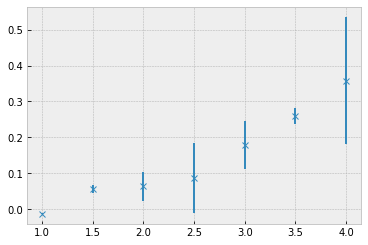

In [43]:
plt.errorbar(vs, rates_avg, yerr=rates_dev, fmt='x')

<ErrorbarContainer object of 3 artists>

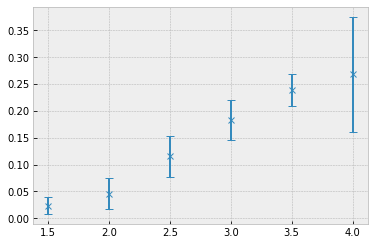

In [78]:
rates_avg = []
rates_dev = []
vs = []

v = 1
d = 90
s = 45

for fname, fnums in files:
    rates = []
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
        try:
            rate = rate0(df, d=d, s=s)
            if rate > 0:
                rates.append(rate)
        except:
            pass
    rates = pd.Series(rates)
        
    rates_avg.append(rates.mean())
    rates_dev.append(rates.std())
    vs.append(v)
    
    v += 0.5

plt.errorbar(vs, rates_avg, yerr=rates_dev, fmt='x', capsize=4.0)
plt.